In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler


RANDOM_STATE=123

Сбалансировать классы  
посмотреть на стандартизованные данные, как это проскакивают НаН  ы
Сравнивать точность между трэйном и тесто  м.



Классификатор на линейной рег  рессии
Классификатор на k-means

We will learn to classify genres of music. Unlike the project that awaits you, here we will not work with raw data (audio tracks), but with meaningful features (though not all of them have clear names). The data itself can be found [here](https://www.kaggle.com/purumalgi/music-genre-classification). We will use the `train.csv` file. Our task will be to predict the `Class` variable (song genre) using decision trees. You can also try other classification methods that we have gone through and compare the results. When training all models, do not forget about the division into training and testing (or cross-validation [link](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Task 1. EDA

As always, let's start by looking at our data: variable types, missing values, class balance, and all that. 

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
data.shape

(17996, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [6]:
data[['Class']].value_counts()

Class
10       4949
6        2587
9        2524
8        1854
5        1447
1        1373
2        1272
0         625
7         576
3         402
4         387
Name: count, dtype: int64

Very unbalanced classes

### Task 2. Training a decision tree (10 points)

Preprocess the features so that they can be fed into the decision tree model and train it, try to select the optimal hyperparameters that you know. Also try to justify the choice of metric in this case. When selecting hyperparameters, `GridSearchCV` [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) can help.

In [7]:
X = data.drop(['Class', 'Artist Name', 'Track Name'], axis=1)
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.8, random_state=RANDOM_STATE)

<Axes: >

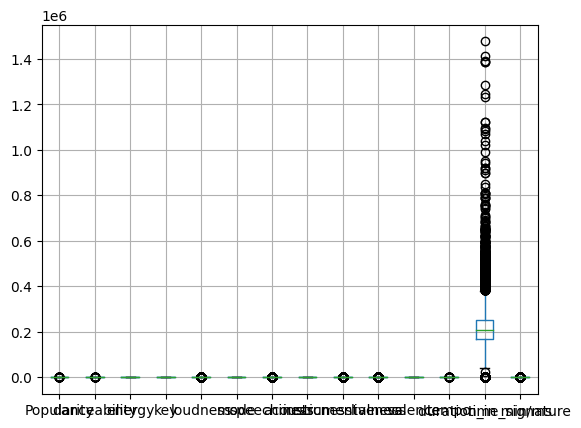

In [8]:
X.boxplot()

In [9]:
y_test.value_counts()

Class
10    976
6     526
9     475
8     399
1     279
5     268
2     264
0     129
7     115
3      88
4      81
Name: count, dtype: int64

In [10]:
y_train.value_counts()

Class
10    3973
6     2061
9     2049
8     1455
5     1179
1     1094
2     1008
0      496
7      461
3      314
4      306
Name: count, dtype: int64

In [11]:
model1 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(max_depth=30, min_samples_split=7, random_state=RANDOM_STATE))
])
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy_score(y_pred, y_test)

0.4286111111111111

In [12]:


# tree1 = DecisionTreeClassifier(
#     max_depth=30, min_samples_split=7, random_state=RANDOM_STATE)
# tree1.fit(X_train, y_train)
# tree1.score(X_test, y_test)

### Task 3. Other models (5 points per model)

Perform the operations from **Task 2** with other classifiers known to you. Has it gotten better?

In [16]:
model2 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_pred, y_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values